In [16]:
import lib
import qutip as qt
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [17]:
# gamma_vals = [1e-2, 1e-1, 0.5, 0.6, 0.7, 0.8, 0.9, 1e0, 1.1, 1.2, 1.3, 5, 1e1, 1e2]
gamma_vals = np.logspace(-2, 2, 15)
def amp_phase(nn_output):
    return nn_output[:, 0] * torch.exp(1.j * 2 * np.pi * nn_output[:, 1])

In [18]:
N = 3
J = 1
input = lib.generate_input_torch(N)

In [19]:
true_eval = []
NN_eval = []
for Gamma in gamma_vals:
    h = lib.TFIM_hamiltonian(N, J, Gamma)
    true_eval.append(h.eigenstates()[0][0])

    model = nn.Sequential(
        nn.Linear(N, 5 * N),
        nn.Sigmoid(),
        nn.Linear(5 * N, 2),
        nn.Sigmoid()
    )

    vars = (N, J, Gamma)
    loss_fn = lib.TFIM_expectation_from_torch
    epochs = []
    loss_data = []
    optimizer = torch.optim.SGD(model.parameters(), lr = 2)
    for epoch in range(1000):
        y_pred = model(input)
        loss = loss_fn(y_pred, vars, amp_phase)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch % 100 == 0:
            loss_data.append(loss.item())
            epochs.append(epoch)
    
    NN_eval.append(loss_data[-1])
    # gs = lib.model_to_ground_state(model, input, amp_phase)

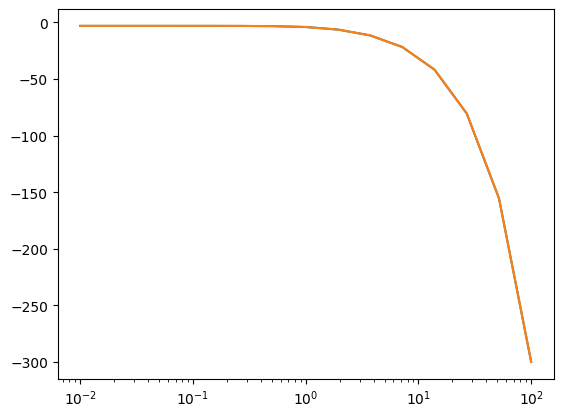

In [20]:
plt.plot(gamma_vals, true_eval)
plt.plot(gamma_vals, NN_eval)
plt.xscale('log')
plt.show()

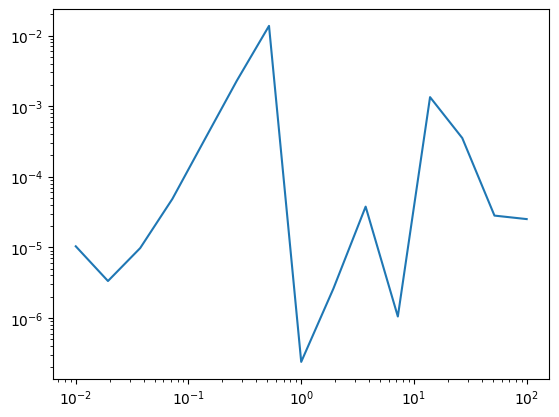

In [21]:
true_eval = np.array(true_eval)
NN_eval = np.array(NN_eval)
plt.plot(gamma_vals, np.abs((true_eval - NN_eval) / true_eval))
plt.xscale('log')
plt.yscale('log')
plt.show()

In [7]:
gamma_vals = [1e-8, 1e-6, 1e-4, 1e-2, 1e0, 1e2, 1e4, 1e6, 1e8] #some of the larger ones will sometimes fail to converge

In [8]:
true_eval = []
NN_eval = []
for Gamma in gamma_vals:
    h = lib.TFIM_hamiltonian(N, J, Gamma)
    true_eval.append(h.eigenstates()[0][0])

    model = nn.Sequential(
        nn.Linear(N, 5 * N),
        nn.Sigmoid(),
        nn.Linear(5 * N, 2),
        nn.Sigmoid()
    )

    vars = (N, J, Gamma)
    loss_fn = lib.TFIM_expectation_from_torch
    epochs = []
    loss_data = []
    optimizer = torch.optim.SGD(model.parameters(), lr = 2)
    for epoch in range(1000):
        y_pred = model(input)
        loss = loss_fn(y_pred, vars, amp_phase)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch % 100 == 0:
            loss_data.append(loss.item())
            epochs.append(epoch)
    
    NN_eval.append(loss_data[-1])
    # gs = lib.model_to_ground_state(model, input, amp_phase)

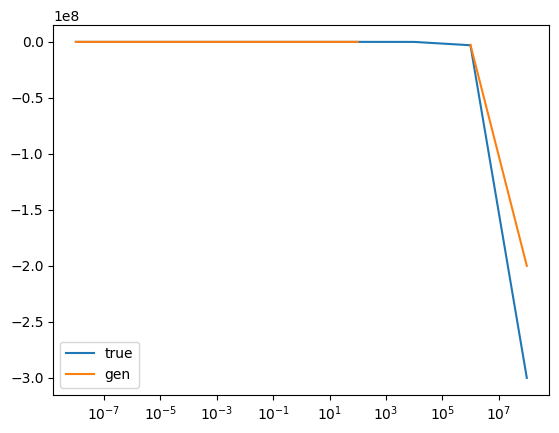

In [9]:
plt.plot(gamma_vals, true_eval, label = 'true')
plt.plot(gamma_vals, NN_eval, label = 'gen')
plt.xscale('log')
plt.legend(loc = 'best')
plt.show()

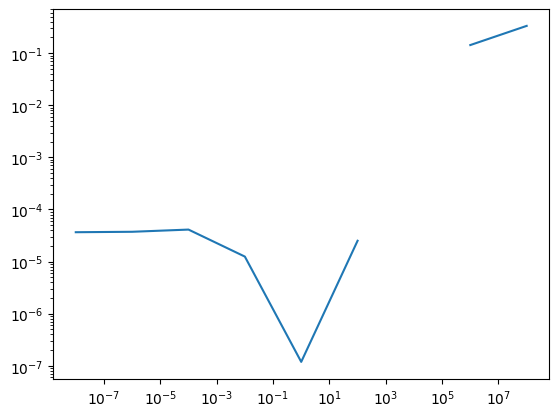

In [10]:
true_eval = np.array(true_eval)
NN_eval = np.array(NN_eval)
plt.plot(gamma_vals, np.abs((true_eval - NN_eval) / true_eval))
plt.xscale('log')
plt.yscale('log')
plt.show()

In [11]:
true_eval

array([-3.00000000e+00, -3.00000000e+00, -3.00000001e+00, -3.00007538e+00,
       -4.00000000e+00, -3.00007538e+02, -3.00000001e+04, -3.00000000e+06,
       -3.00000000e+08])

In [12]:
NN_eval

array([-2.99989009e+00, -2.99988794e+00, -2.99987650e+00, -3.00003791e+00,
       -3.99999952e+00, -3.00000000e+02,             nan, -2.57142850e+06,
       -2.00000000e+08])